# Read Hand Signs from 0-5 in digits using picture

### For Example :

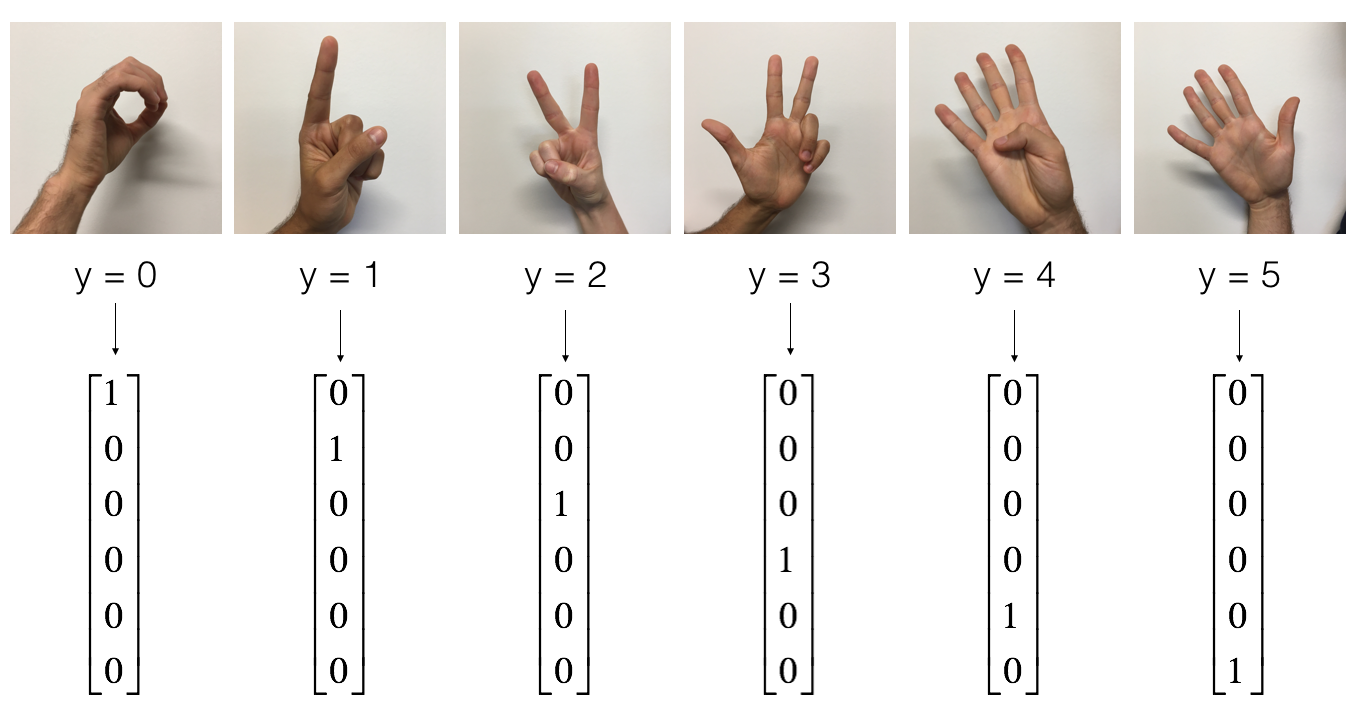




In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.pyplot as imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from cnn_utils import *
from test_utils import summary, comparator


%matplotlib inline
np.random.seed(1)

In [3]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


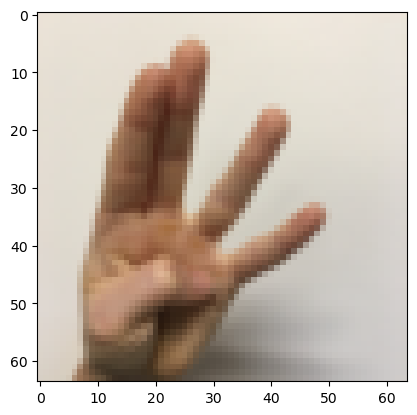

In [4]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [6]:
X_train = X_train_orig/255
X_test = X_test_orig/255

In [25]:
Y_train = Y_train_orig
Y_test = Y_test_orig

In [26]:
Y_temp = np.zeros((Y_train.size, Y_train.max() + 1))
Y_temp[np.arange(Y_train.size), Y_train] = 1
Y_train = Y_temp

In [27]:
Y_temp = np.zeros((Y_test.size, Y_test.max() + 1))
Y_temp[np.arange(Y_test.size), Y_test] = 1
Y_test = Y_temp

In [28]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [30]:

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)

    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = 4, strides = 1, padding='same')(input_img)
    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPooling2D(pool_size = (8,8), strides = 8, padding = 'same')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = 2, strides = 1, padding='same')(P1)
    ## RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPooling2D(pool_size = (4,4), strides = 4, padding = 'same')(A2)
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tf.keras.layers.Dense(6, activation = 'softmax')(F)   

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [39]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                           

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)


In [41]:
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 1.8106 - accuracy: 0.1343 - val_loss: 1.7929 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7899 - accuracy: 0.1667 - val_loss: 1.7880 - val_accuracy: 0.1667
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7863 - accuracy: 0.1981 - val_loss: 1.7853 - val_accuracy: 0.2333
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7841 - accuracy: 0.2009 - val_loss: 1.7828 - val_accuracy: 0.2500
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7813 - accuracy: 0.2093 - val_loss: 1.7799 - val_accuracy: 0.2500
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7781 - accuracy: 0.2093 - val_loss: 1.7763 - val_accuracy: 0.2833
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7738 - accuracy: 0.2417 - val_loss: 1.7719 - val_accuracy: 0.2750
Epoch 8/100


17/17 [==============================] - 0s 9ms/step - loss: 0.5275 - accuracy: 0.8389 - val_loss: 0.5966 - val_accuracy: 0.7833
Epoch 59/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5195 - accuracy: 0.8407 - val_loss: 0.5898 - val_accuracy: 0.7833
Epoch 60/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5119 - accuracy: 0.8444 - val_loss: 0.5829 - val_accuracy: 0.7833
Epoch 61/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5044 - accuracy: 0.8463 - val_loss: 0.5760 - val_accuracy: 0.7833
Epoch 62/100
17/17 [==============================] - 0s 8ms/step - loss: 0.4971 - accuracy: 0.8472 - val_loss: 0.5694 - val_accuracy: 0.7833
Epoch 63/100
17/17 [==============================] - 0s 11ms/step - loss: 0.4902 - accuracy: 0.8509 - val_loss: 0.5637 - val_accuracy: 0.7917
Epoch 64/100
17/17 [==============================] - 0s 10ms/step - loss: 0.4834 - accuracy: 0.8546 - val_loss: 0.5574 - val_accuracy: 0.7917
Epoch 65/100
17/1

C:\Users\akash\AppData\Local\Temp\ipykernel_24968\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\akash\AppData\Local\Temp\ipykernel_24968\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

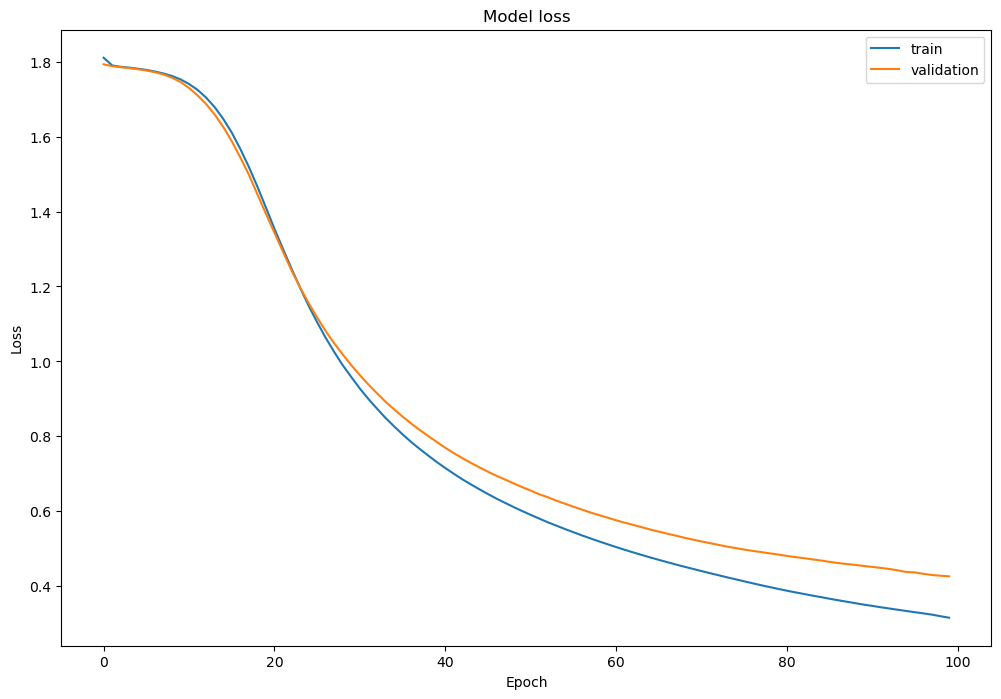

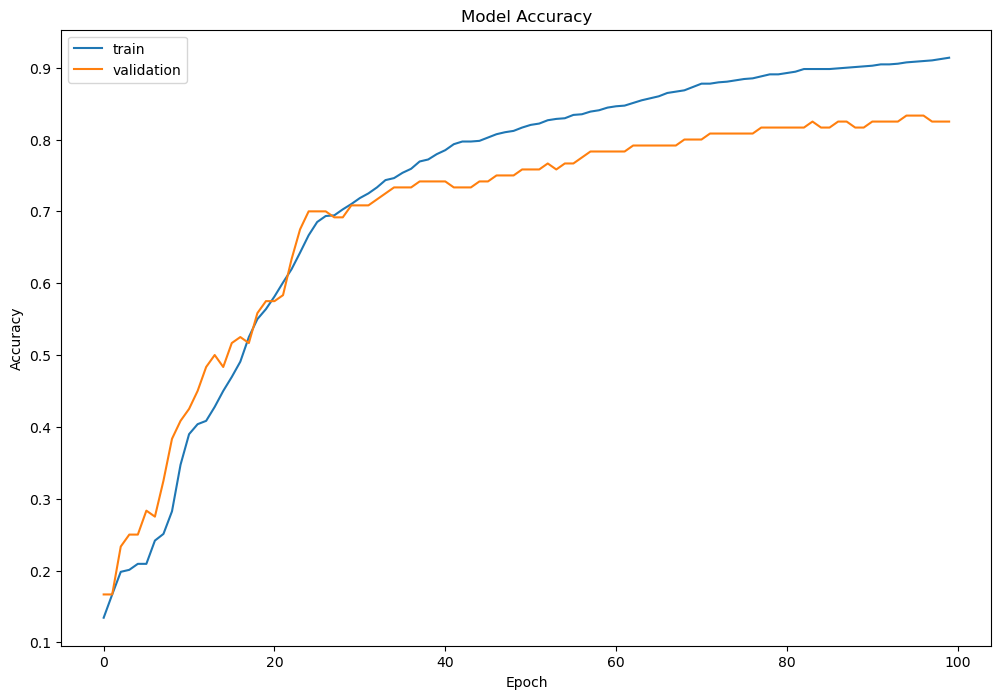

In [42]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [43]:
y_hat = conv_model.predict(test_dataset)


2/2 [==============================] - 0s 16ms/step


AttributeError: '_BatchDataset' object has no attribute 'numpy'